Name: Justin Wong Juin Hng
Admin Number: p2112646

In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
num_df = pd.read_csv('wine.csv')
plot_df = num_df.copy()
display(num_df.head())
unscaled_plot = plot_df.copy()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L),cultivator
0,14.23,1.71,127,3.06,0.28,5.64,1065,0
1,13.20,1.78,100,2.76,0.26,4.38,1050,0
2,13.16,2.36,101,3.24,0.30,5.68,1185,0
3,14.37,1.95,113,3.49,0.24,7.80,1480,0
4,13.24,2.59,118,2.69,0.39,4.32,735,0


In [233]:
num_df = num_df.drop(columns='cultivator',axis=1)
# scaling the data before PCA
from sklearn.preprocessing import scale
unscaled_num = num_df.copy()
num_df = pd.DataFrame(scale(num_df), columns=num_df.columns)
display(num_df.head())

# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=7).fit(num_df)
pca_samples = pca.transform(num_df)

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
0,1.562716,-0.591231,2.542453,1.078247,-0.755894,0.255449,0.980662
1,0.266967,-0.523908,0.201225,0.777458,-0.925743,-0.319077,0.933981
2,0.216646,0.033919,0.287937,1.258720,-0.586044,0.273688,1.354112
3,1.738838,-0.360407,1.328483,1.509377,-1.095592,1.240351,2.272176
4,0.317287,0.255126,1.762044,0.707274,0.178277,-0.346435,-0.046325


In [234]:
def pca_results(data, pca):

    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue'])
    eigenvalues.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # PCA cum explained variance
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

pca_results = pca_results(num_df, pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
PC 1,3.0084,0.4265,0.4265,0.4118,-0.2166,0.3923,0.4317,-0.3888,0.1845,0.5080
PC 2,2.1718,0.3079,0.7344,0.3584,0.5076,0.2185,-0.3708,0.3265,0.5544,0.1209
PC 3,0.5888,0.0835,0.8178,-0.3204,0.3503,0.7918,0.0457,-0.1262,-0.2683,-0.2403
PC 4,0.4619,0.0655,0.8833,0.1060,0.5560,-0.3540,-0.0159,-0.7333,0.0108,-0.1272
PC 5,0.3959,0.0561,0.9395,-0.2835,-0.4337,0.1451,-0.2860,-0.3672,0.6202,-0.3305
PC 6,0.2398,0.0340,0.9734,-0.7041,0.2488,-0.1422,0.2676,0.0680,0.3140,0.4973
PC 7,0.1873,0.0266,1.0000,0.1093,0.1165,-0.0701,0.7214,0.2215,0.3212,-0.5449


<Figure size 432x288 with 0 Axes>

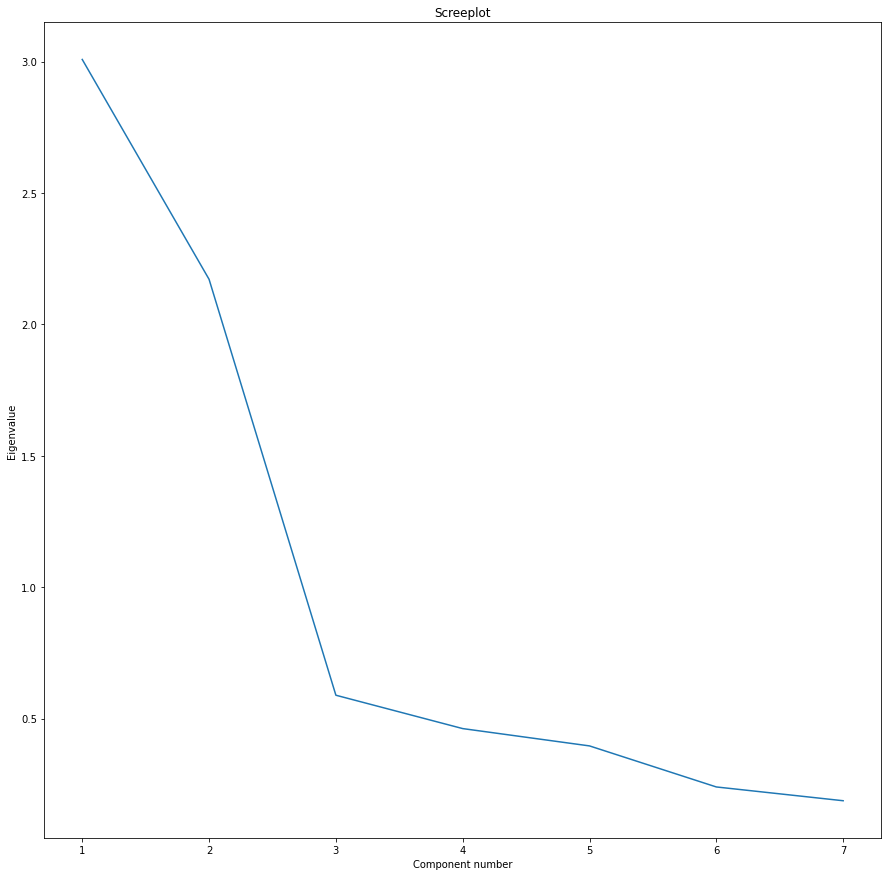

In [235]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

<Figure size 432x288 with 0 Axes>

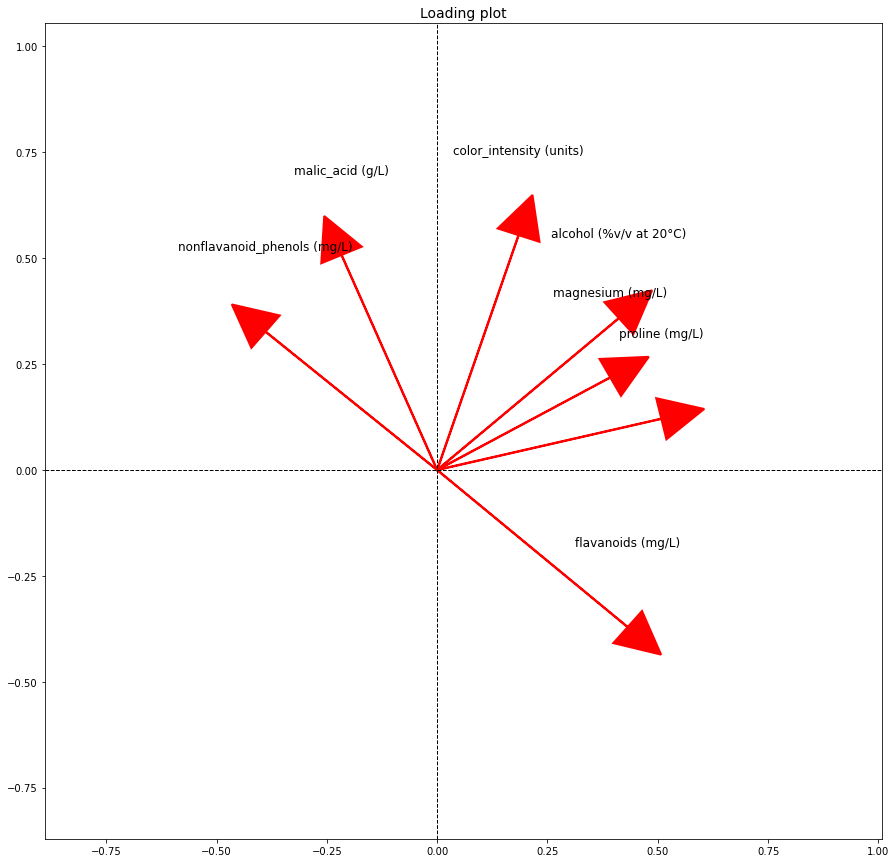

In [236]:
# loading graph pca 1 and 2
load = PCA(n_components=3).fit(num_df)
load_score = load.transform(num_df)
def loadingplot(data, pca,x,y, width=15, height=15, margin=0.5):
    x -=1
    y-=1
    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[x,:].min(),0)-margin
    x_max = max(pca.components_[x,:].max(),0)+margin
    y_min = min(pca.components_[y,:].min(),0)-margin
    y_max = max(pca.components_[y,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[x], v[y], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[x], v[y]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_title("Loading plot", fontsize = 14)

    return ax

plt.clf()

ax5 = loadingplot(num_df, pca,1,2)
plt.show()

<Figure size 432x288 with 0 Axes>

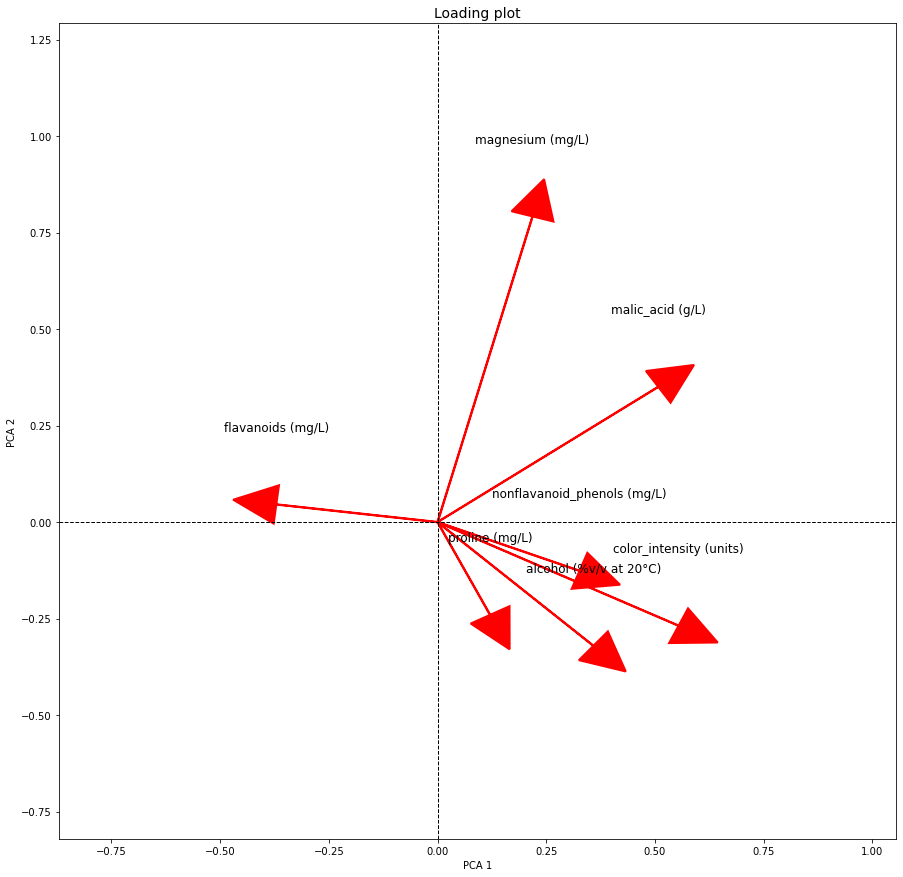

In [237]:
# loading graph pca 2 and 3

plt.clf()

ax5 = loadingplot(num_df, pca,2,3)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

<Figure size 432x288 with 0 Axes>

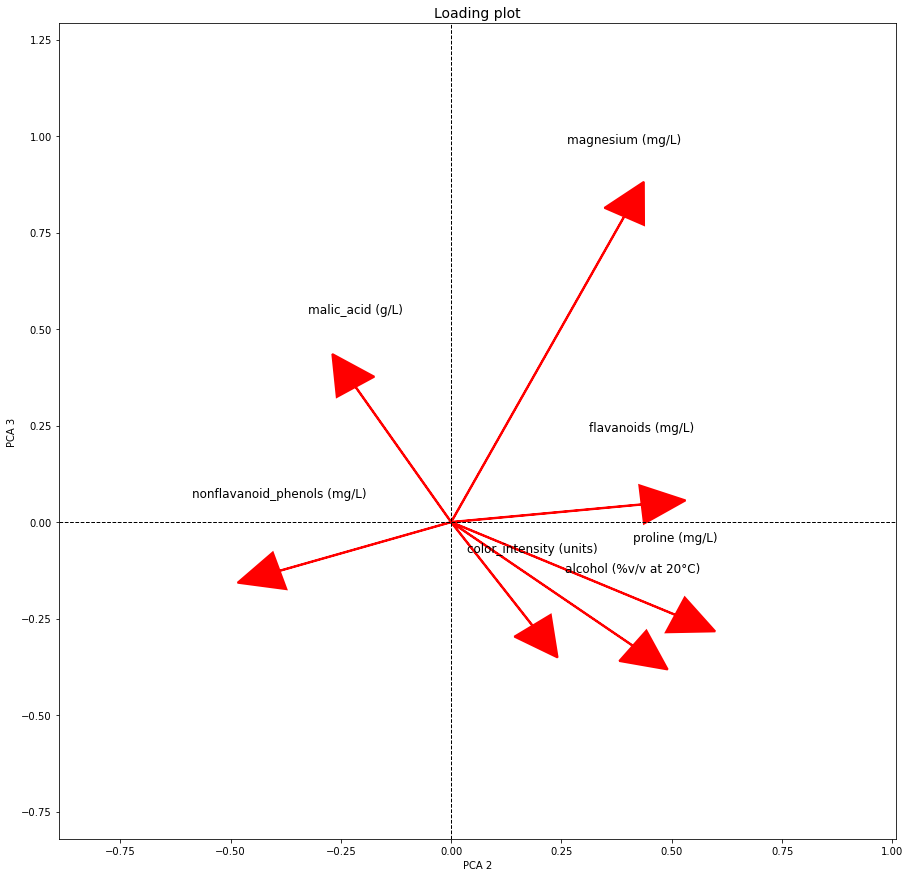

In [238]:
# loading graph pca 1 and 3

plt.clf()

ax5 = loadingplot(num_df, pca,1,3)

plt.xlabel("PCA 2")
plt.ylabel("PCA 3")
plt.show()

,PC1,PC2,PC3
0,3.073581,0.428910,1.145812
1,1.413477,-0.780900,-0.096167
2,1.704442,-0.184967,-0.096864
3,3.775921,0.775342,-0.302990
4,0.915151,0.226433,1.496797
...,...,...,...
126,-0.202311,2.301137,-1.501631
127,-0.518527,2.231148,0.270915
128,0.301726,3.481525,1.262642
129,0.199707,2.666727,0.732344


Text(0, 0.5, 'PCA 3')

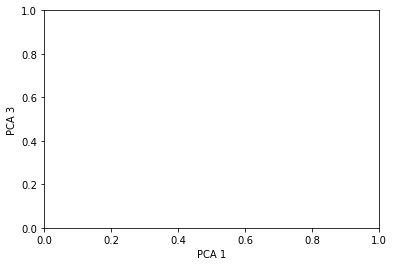

In [239]:
# take only first 3 pcs cos they explain >80% of variance in dataset
pca = PCA(n_components=3).fit(num_df)
pca_samples = pca.transform(num_df)
scores = pd.DataFrame(pca_samples,columns=['PC1','PC2','PC3'])
display(scores)

def scoreplot_label(data, scores, pca, x, y,width=10, height=10, margin=0.5,):
    x-=1
    y-=1
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x=x, y=y, data = scores, style=data['cultivator'], hue=data['cultivator'])
    
    #Set limits for figure
    x_min = min(scores[x].min(),0)-margin
    x_max = max(scores[x].max(),0)+margin
    y_min = min(scores[y].min(),0)-margin
    y_max = max(scores[y].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

plt.xlabel("PCA 1")
plt.ylabel("PCA 3")

In [240]:
# stitch unidentified cultivator
unidentified = pd.DataFrame({'alcohol (%v/v at 20°C)':[12.75],'malic_acid (g/L)':[3.11],'magnesium (mg/L)':[96],'flavanoids (mg/L)':[0.61],'nonflavanoid_phenols (mg/L)':[0.52],'color_intensity (units)':[4.56],'proline (mg/L)':[632],'cultivator':[3]})

unidentified_plot = pd.concat([unscaled_plot,unidentified],ignore_index=True)
display(unidentified_plot.head())

unidentified = unidentified.drop(columns=['cultivator'],axis=1)

unidentified_num = pd.concat([unscaled_num,unidentified],ignore_index=True)
unidentified_num = pd.DataFrame(scale(unidentified_num), columns=unscaled_num.columns)
display(unidentified_num.head())

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L),cultivator
0,14.23,1.71,127,3.06,0.28,5.64,1065,0
1,13.20,1.78,100,2.76,0.26,4.38,1050,0
2,13.16,2.36,101,3.24,0.30,5.68,1185,0
3,14.37,1.95,113,3.49,0.24,7.80,1480,0
4,13.24,2.59,118,2.69,0.39,4.32,735,0


,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
0,1.570412,-0.597937,2.553041,1.085056,-0.763782,0.258170,0.986685
1,0.270167,-0.530502,0.203083,0.785271,-0.933226,-0.318422,0.939850
2,0.219672,0.028244,0.290118,1.264927,-0.594338,0.276474,1.361366
3,1.747144,-0.366732,1.334544,1.514748,-1.102670,1.246614,2.282458
4,0.320662,0.249815,1.769722,0.715321,0.168160,-0.345879,-0.043689


In [241]:

pca_samples = pca.transform(unidentified_num)
scores = pd.DataFrame(pca_samples)
display(scores)

,0,1,2
0,3.091924,0.427713,1.148511
1,1.426337,-0.786964,-0.098315
2,1.717876,-0.188876,-0.099255
3,3.794539,0.776844,-0.306080
4,0.929551,0.220963,1.500797
...,...,...,...
127,-0.502226,2.225918,0.270378
128,0.321357,3.480328,1.265624
129,0.220294,2.662528,0.735168
130,-0.932051,3.301319,-0.603494


Text(0, 0.5, 'PCA 2')

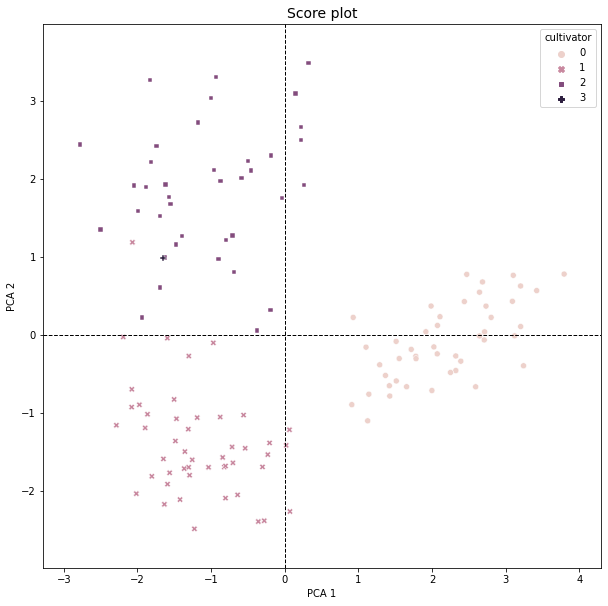

In [242]:
# pca 1 and 2
ax4 = scoreplot_label(unidentified_plot, scores, pca,1,2)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

Text(0, 0.5, 'PCA 3')

<Figure size 432x288 with 0 Axes>

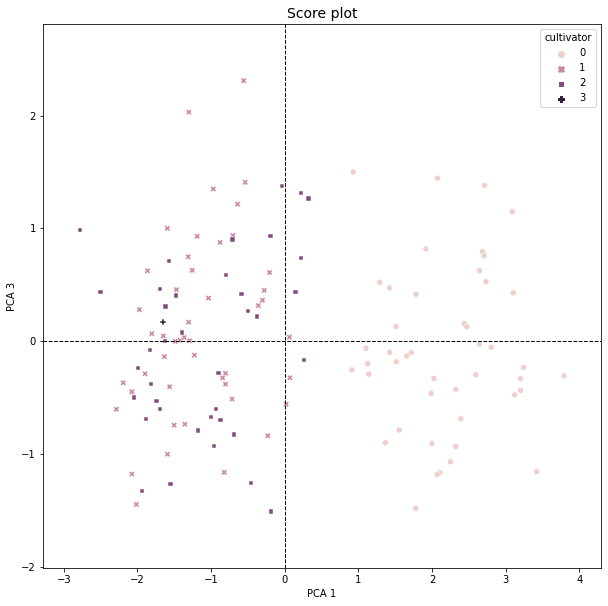

In [243]:
plt.clf()
ax4 = scoreplot_label(unidentified_plot, scores, pca,1,3)
plt.xlabel("PCA 1")
plt.ylabel("PCA 3")

Text(0, 0.5, 'PCA 3')

<Figure size 432x288 with 0 Axes>

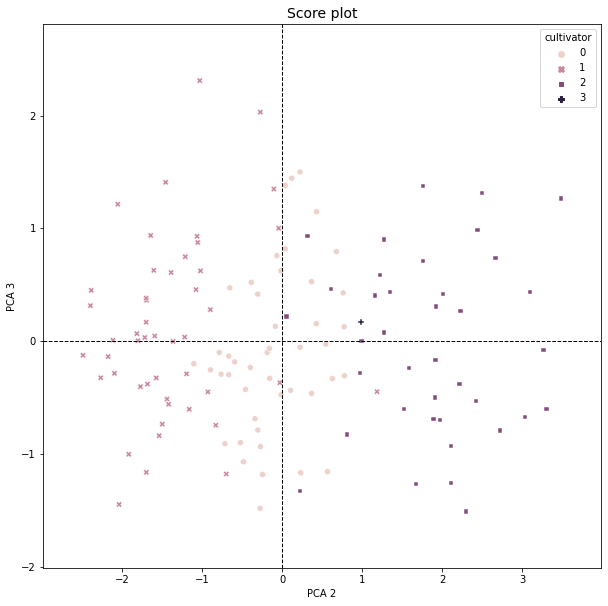

In [244]:
plt.clf()
ax4 = scoreplot_label(unidentified_plot, scores, pca,2,3)
plt.xlabel("PCA 2")
plt.ylabel("PCA 3")